In [356]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [357]:
tsla_df = pd.read_pickle('tsla/tsla_merged.pickle')

In [358]:
df = tsla_df
df = df.drop(columns= ['LastPrice', 'Symbol', 'Volume', 'OpenInterest', 'Volume'])



In [359]:
df['ExpirationDate'] =  pd.to_datetime(df['ExpirationDate'], infer_datetime_format=True)
df['DataDate'] =  pd.to_datetime(df['DataDate'], infer_datetime_format=True)
df['delta'] = df['ExpirationDate'] - df['DataDate']

df['exp?'] =df['ExpirationDate'] ==df['DataDate']
df['long_close'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['long_medium'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['long_far'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))
df['short_close'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['short_medium'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['short_far'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))

pd.set_option('display.max_columns', 30)

In [360]:
df_table=df.loc[:, ['OptionKey', 'BidPrice']]
df_table=df_table.reset_index()
df_table.columns=['PriceDate', 'OptionKey', 'RebuyPrice']
df_table['RebuyPrice'].nunique()

1259

In [361]:
xp = df
xp.loc[xp['exp?']== True, 'xp' ] = xp.loc[df['exp?'] == True, 'AskPrice']
xp = xp.loc[xp['exp?']== True]
xp= xp[['OptionKey', 'xp']]
xp

,OptionKey,xp
2019-11-15,TSLA2019-11-15P165.00,0.01
2019-11-15,TSLA2019-11-15P170.00,0.01
2019-11-15,TSLA2019-11-15P180.00,0.06
2019-11-15,TSLA2019-11-15P200.00,0.01
2019-11-15,TSLA2019-11-15P205.00,0.01
...,...,...
2019-12-13,TSLA2019-12-13P375.00,18.60
2019-12-13,TSLA2019-12-13P380.00,23.60
2019-12-13,TSLA2019-12-13P385.00,28.55
2019-12-13,TSLA2019-12-13P395.00,38.55


In [362]:
df['xp']=df.OptionKey.map(xp.set_index('OptionKey')['xp'])
df

,OptionKey,ExpirationDate,AskPrice,BidPrice,PutCall,StrikePrice,UnderlyingPrice,DataDate,time delta,% out,LSTM Predicted Signal,RF Predicted Value,delta,exp?,long_close,long_medium,long_far,short_close,short_medium,short_far,xp
2019-11-13,TSLA2019-11-15P155.00,2019-11-15,0.05,0.0,put,155.0,346.11,2019-11-13,2 days,-0.552165,1,1,2 days,False,False,False,False,False,False,False,NaN
2019-11-13,TSLA2019-11-15P165.00,2019-11-15,0.01,0.0,put,165.0,346.11,2019-11-13,2 days,-0.523273,1,1,2 days,False,False,False,False,False,False,False,0.01
2019-11-13,TSLA2019-11-15P185.00,2019-11-15,0.03,0.0,put,185.0,346.11,2019-11-13,2 days,-0.465488,1,1,2 days,False,False,False,False,False,False,False,NaN
2019-11-13,TSLA2019-11-15P190.00,2019-11-15,0.02,0.0,put,190.0,346.11,2019-11-13,2 days,-0.451042,1,1,2 days,False,False,False,False,False,False,False,NaN
2019-11-13,TSLA2019-11-15P205.00,2019-11-15,0.03,0.0,put,205.0,346.11,2019-11-13,2 days,-0.407703,1,1,2 days,False,False,False,False,False,False,False,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,TSLA2019-12-27P440.00,2019-12-27,47.90,46.6,put,440.0,393.15,2019-12-18,9 days,0.119166,1,1,9 days,False,False,False,False,False,False,False,NaN
2019-12-18,TSLA2019-12-27P445.00,2019-12-27,53.00,51.2,put,445.0,393.15,2019-12-18,9 days,0.131884,1,1,9 days,False,False,False,False,False,False,False,NaN
2019-12-18,TSLA2019-12-27P465.00,2019-12-27,72.60,71.4,put,465.0,393.15,2019-12-18,9 days,0.182755,1,1,9 days,False,False,False,False,False,False,False,NaN
2019-12-18,TSLA2019-12-27P470.00,2019-12-27,78.15,76.4,put,470.0,393.15,2019-12-18,9 days,0.195472,1,1,9 days,False,False,False,False,False,False,False,NaN


In [363]:
short_close_LSTM = df.loc[(df['short_close']== True) & (df['LSTM Predicted Signal'] == 1)]
short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']
short_close_LSTM_total = short_close_LSTM['log'].sum()
print(short_close_LSTM_total)

66.73000000000002


<ipython-input-363-1d9b8a5588f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']


In [364]:
short_close_RF = df.loc[(df['short_close']== True) & (df['RF Predicted Value'] == 1)]
short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']
short_close_RF_total = short_close_RF['log'].sum()
print(short_close_RF_total)

-183.46999999999997


<ipython-input-364-26e370e263bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']


In [365]:
short_medium_LSTM = df.loc[(df['short_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']
short_medium_LSTM_total = short_medium_LSTM['log'].sum()
print(short_medium_LSTM_total)

6.51


<ipython-input-365-47cc65b57caf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']


In [366]:
short_medium_RF = df.loc[(df['short_medium']== True) & (df['RF Predicted Value'] == 1)]
short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']
short_medium_RF_total = short_medium_RF['log'].sum()
print(short_medium_RF_total)

7.68


<ipython-input-366-3e62de6047f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']


In [367]:
short_far_LSTM = df.loc[(df['short_far']== True) & (df['LSTM Predicted Signal'] == 1)]
short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']
short_far_LSTM_total = short_far_LSTM['log'].sum()
print(short_far_LSTM_total)

0.25999999999999995


<ipython-input-367-97cde8b08bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']


In [368]:
short_far_RF = df.loc[(df['short_far']== True) & (df['RF Predicted Value'] == 1)]
short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']
short_far_RF_total = short_far_RF['log'].sum()
print(short_far_RF_total)

0.47


<ipython-input-368-18c5042b77ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']


In [369]:
long_close_LSTM = df.loc[(df['long_close']== True) & (df['LSTM Predicted Signal'] == 1)]
long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']
long_close_LSTM_total = long_close_LSTM['log'].sum()
print(long_close_LSTM_total)

<ipython-input-369-14bc539d4f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']


183.60000000000002


In [370]:
long_close_RF = df.loc[(df['long_close']== True) & (df['RF Predicted Value'] == 1)]
long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']
long_close_RF_total = long_close_RF['log'].sum()
print(long_close_RF_total)

<ipython-input-370-2c96faa3b979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']


-284.4199999999999


In [371]:
long_far_RF = df.loc[(df['long_far']== True) & (df['RF Predicted Value'] == 1)]
long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']
long_far_RF_total = long_far_RF['log'].sum()
print(long_far_RF_total)

<ipython-input-371-42ba9debbf05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']


1.19


In [372]:
long_far_LSTM = df.loc[(df['long_far']== True) & (df['LSTM Predicted Signal'] == 1)]
long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']
long_far_LSTM_total = long_far_LSTM['log'].sum()
print(long_far_LSTM_total)

0.4


<ipython-input-372-ded057f9d0d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']


In [373]:
long_medium_LSTM = df.loc[(df['long_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']
long_medium_LSTM_total = long_medium_LSTM['log'].sum()
print(long_medium_LSTM_total)

<ipython-input-373-e86d80339e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']


17.59


In [374]:
long_medium_RF = df.loc[(df['long_medium']== True) & (df['RF Predicted Value'] == 1)]
long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']
long_medium_RF_total = long_medium_RF['log'].sum()
print(long_medium_RF_total)

27.610000000000003


<ipython-input-374-29d39dcc6c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']


In [375]:
df = pd.DataFrame()
df['short_close_negatives_RF'] =(short_close_RF.log[(short_close_RF.log < 0)]).count(),
df['short_close_positives_RF'] =(short_close_RF.log[(short_close_RF.log > 0)]).count(),

df['short_close_negatives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log < 0)]).count(),
df['short_close_positives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log > 0)]).count(),

df['short_medium_negatives_RF'] =(short_medium_RF.log[(short_medium_RF.log < 0)]).count(),
df['short_medium_positives_RF'] =(short_medium_RF.log[(short_medium_RF.log > 0)]).count(),

df['short_medium_negatives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log < 0)]).count(),
df['short_medium_positives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log > 0)]).count(),

df['short_far_negatives_RF'] =(short_far_RF.log[(short_far_RF.log < 0)]).count(),
df['short_far_positives_RF'] =(short_far_RF.log[(short_far_RF.log > 0)]).count(),

df['short_far_negatives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log < 0)]).count(),
df['short_far_positives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log > 0)]).count()


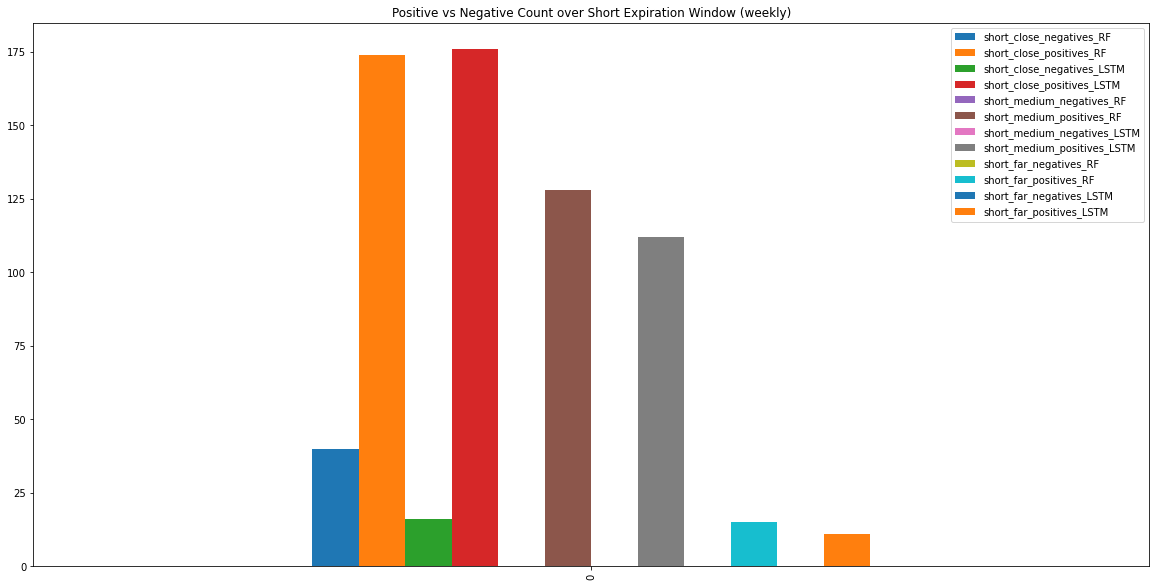

In [431]:
df = df.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (weekly)").get_figure()

In [432]:
df.savefig('tsla_neg_pos')

In [377]:
lf = pd.DataFrame()
lf['long_close_negatives_RF'] =(long_close_RF.log[(long_close_RF.log < 0)]).count(),
lf['long_close_positives_RF'] =(long_close_RF.log[(long_close_RF.log > 0)]).count(),

lf['long_close_negatives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log < 0)]).count(),
lf['long_close_positives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log > 0)]).count(),

lf['long_medium_negatives_RF'] =(long_medium_RF.log[(long_medium_RF.log < 0)]).count(),
lf['long_medium_positives_RF'] =(long_medium_RF.log[(long_medium_RF.log > 0)]).count(),

lf['long_medium_negatives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log < 0)]).count(),
lf['long_medium_positives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log > 0)]).count(),

lf['long_far_negatives_RF'] =(long_far_RF.log[(long_far_RF.log < 0)]).count(),
lf['long_far_positives_RF'] =(long_far_RF.log[(long_far_RF.log > 0)]).count(),

lf['long_far_negatives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log < 0)]).count(),
lf['long_far_positives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log > 0)]).count()

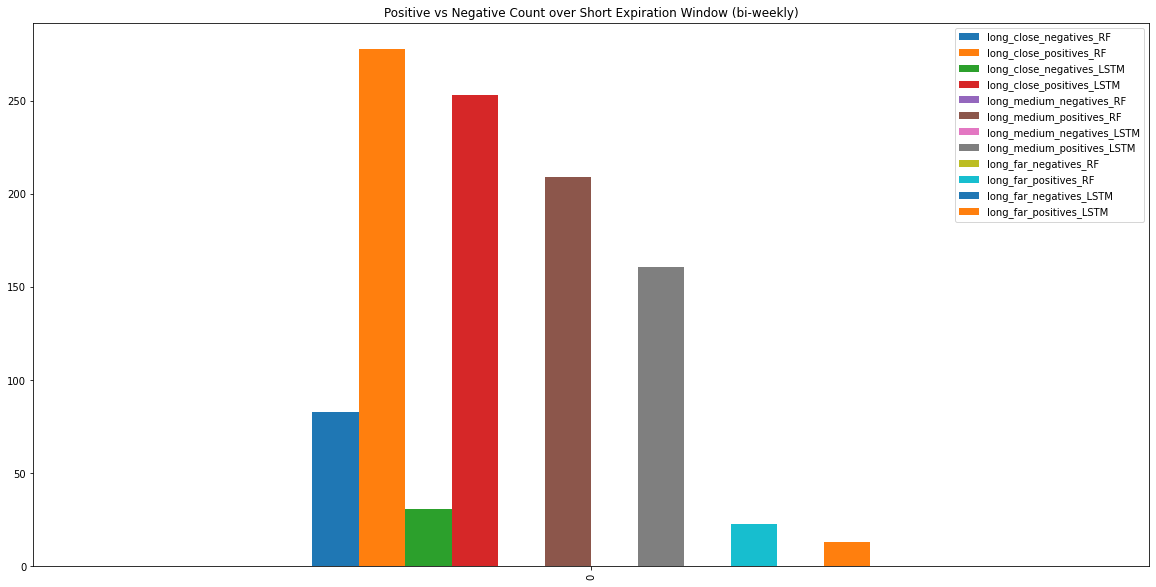

In [433]:
lf=lf.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (bi-weekly)").get_figure()

In [434]:
lf.savefig('tsla_neg_pos_lf')

In [391]:
short_equity_curve = pd.DataFrame()
short_equity_curve['short_close_RF_group'] = short_close_RF['log'].groupby(short_close_RF.index).sum()
short_equity_curve['short_close_LSTM_group'] = short_close_LSTM['log'].groupby(short_close_LSTM.index).sum()
short_equity_curve['short_medium_RF_group'] = short_medium_RF['log'].groupby(short_medium_RF.index).sum()
short_equity_curve['short_medium_LSTM_group'] = short_medium_LSTM['log'].groupby(short_medium_LSTM.index).sum()
short_equity_curve['short_far_RF_group'] = short_far_RF['log'].groupby(short_far_RF.index).sum()
short_equity_curve['short_far_LSTM_group'] = short_far_LSTM['log'].groupby(short_far_LSTM.index).sum()

In [392]:
short_equity_curve = short_equity_curve.cumsum()
short_equity_curve = short_equity_curve.fillna(method = 'backfill' )
short_equity_curve

,short_close_RF_group,short_close_LSTM_group,short_medium_RF_group,short_medium_LSTM_group,short_far_RF_group,short_far_LSTM_group
2019-11-13,10.51,10.51,0.26,0.26,0.03,0.03
2019-11-14,14.86,14.86,0.38,0.38,0.03,0.03
2019-11-15,-22.41,-22.41,1.30,1.30,0.08,0.08
2019-11-18,-52.56,-52.56,1.81,1.81,0.09,0.09
2019-11-19,-166.64,-34.16,2.74,2.70,0.22,0.13
2019-11-20,-215.04,-34.16,3.36,2.70,0.24,0.13
2019-11-21,-286.19,-34.16,4.19,2.70,0.26,0.13
2019-11-22,-263.85,-34.16,4.56,2.70,0.33,0.13
2019-11-26,-258.48,-34.16,4.64,2.70,0.33,0.13
2019-11-27,-256.52,-34.16,4.66,2.70,0.33,0.13


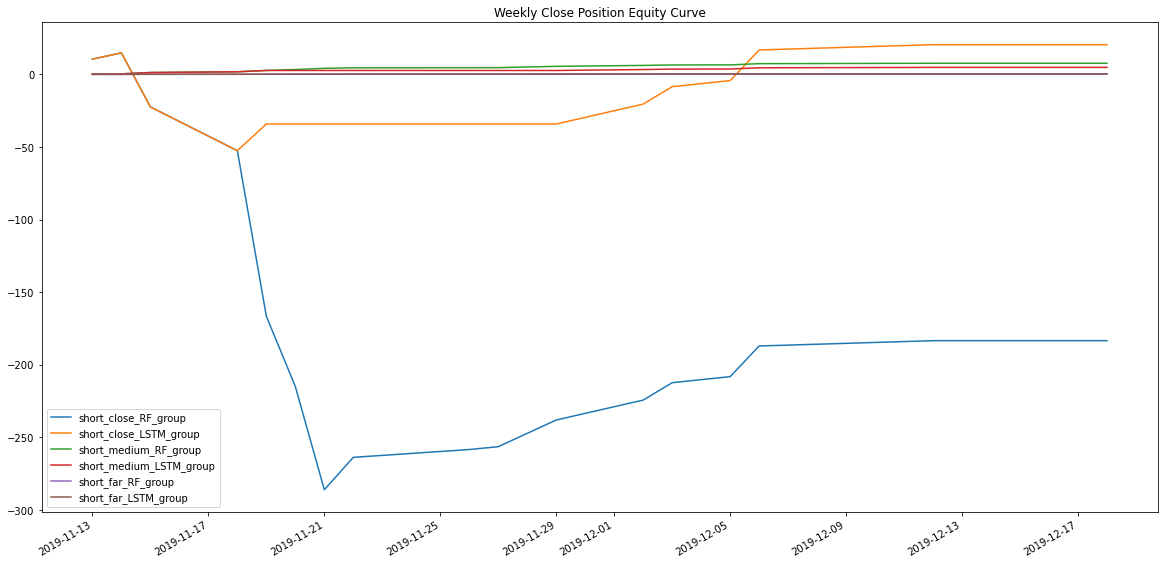

In [403]:
se = short_equity_curve.plot(kind ='line', figsize = (20,10),title ="Weekly Close Position Equity Curve").get_figure()

In [404]:
se.savefig('tsla_short_equity_curve')

In [394]:
long_equity_curve = pd.DataFrame()
long_equity_curve['long_close_RF_group'] = long_close_RF['log'].groupby(long_close_RF.index).sum()
long_equity_curve['long_close_LSTM_group'] =long_close_LSTM['log'].groupby(long_close_LSTM.index).sum()
long_equity_curve['long_medium_RF_group'] = long_medium_RF['log'].groupby(long_medium_RF.index).sum()
long_equity_curve['long_medium_LSTM_group'] = long_medium_LSTM['log'].groupby(long_medium_LSTM.index).sum()
long_equity_curve['long_far_RF_group'] = long_far_RF['log'].groupby(long_far_RF.index).sum()
long_equity_curve['long_far_LSTM_group'] = long_far_LSTM['log'].groupby(long_far_LSTM.index).sum()

In [395]:
long_equity_curve = long_equity_curve.cumsum()
long_equity_curve = long_equity_curve.fillna(method = 'backfill' )
long_equity_curve

,long_close_RF_group,long_close_LSTM_group,long_medium_RF_group,long_medium_LSTM_group,long_far_RF_group,long_far_LSTM_group
2019-11-13,23.74,23.74,3.24,3.24,0.13,0.13
2019-11-14,20.64,20.64,5.56,5.56,0.17,0.17
2019-11-15,-16.63,-16.63,6.48,6.48,0.22,0.22
2019-11-18,-73.89,-73.89,8.65,8.65,0.23,0.23
2019-11-19,-306.20,-55.49,12.35,9.54,0.57,0.27
2019-11-20,-401.85,-55.49,15.57,9.54,0.68,0.27
2019-11-21,-543.87,-55.49,18.82,9.54,0.82,0.27
2019-11-22,-521.53,-55.49,19.19,9.54,0.89,0.27
2019-11-26,-488.04,-55.49,20.08,9.54,0.99,0.27
2019-11-27,-462.00,-55.49,21.05,9.54,1.05,0.27


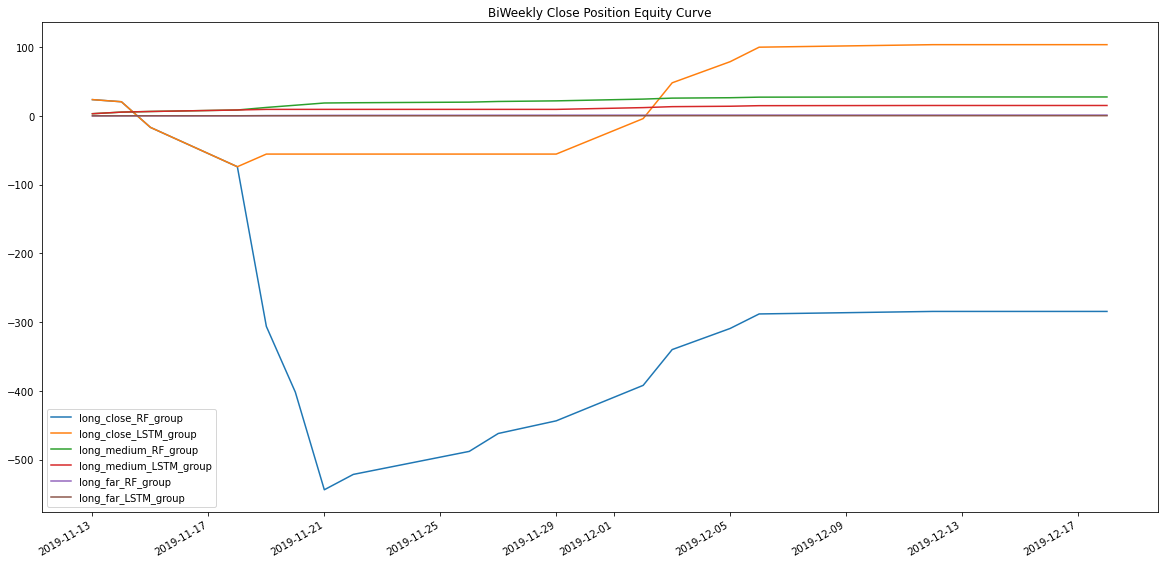

In [405]:
le = long_equity_curve.plot(kind ='line', figsize = (20,10), title ="BiWeekly Close Position Equity Curve").get_figure()

In [406]:
le.savefig('tsla_long_equity_curve')

In [385]:
print(f'the biggest loses were', short_close_RF_total)

the biggest loses were -183.46999999999997


In [386]:
print('Selling options expiring in a week and close to the money,\n RF generated:', short_close_RF_total, '\n LSTM generated:', short_close_LSTM_total)
print('\nSelling options expiring in a week and slightly out to the money,\n RF generated:', short_medium_RF_total, '\n LSTM generated:', short_medium_LSTM_total)
print('\nSelling options expiring in a week and far out to the money,\n RF generated:', short_far_RF_total, '\n LSTM generated:', short_far_LSTM_total)


Selling options expiring in a week and close to the money,
 RF generated: -183.46999999999997 
 LSTM generated: 66.73000000000002

Selling options expiring in a week and slightly out to the money,
 RF generated: 7.68 
 LSTM generated: 6.51

Selling options expiring in a week and far out to the money,
 RF generated: 0.47 
 LSTM generated: 0.25999999999999995


In [387]:
print('Selling options expiring in a two weeks and close to the money,\n RF generated:', long_close_RF_total, '\n LSTM generated:', long_close_LSTM_total)
print('\nSelling options expiring in two weeks and slightly out to the money,\n RF generated:', long_medium_RF_total, '\n LSTM generated:', long_medium_LSTM_total)
print('\nSelling options expiring in two weeks and far out to the money,\n RF generated:', long_far_RF_total, '\n LSTM generated:', long_far_LSTM_total)


Selling options expiring in a two weeks and close to the money,
 RF generated: -284.4199999999999 
 LSTM generated: 183.60000000000002

Selling options expiring in two weeks and slightly out to the money,
 RF generated: 27.610000000000003 
 LSTM generated: 17.59

Selling options expiring in two weeks and far out to the money,
 RF generated: 1.19 
 LSTM generated: 0.4


In [479]:
#max DD calculation
maxDDLE = 0

for (columnName, columnData) in long_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDLE:
            maxDDLE = x

maxDDSE = 0

for (columnName, columnData) in short_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDSE:
            maxDDSE = x
            
print(f'Short window max DD {maxDDSE}')            
print(f'Long window max DD {maxDDLE}')

Short window max DD -286.19
Long window max DD -543.8699999999999
